Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)



In [79]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

import warnings 
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('baseball.csv')

In [13]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This data has 17 total columns out of which The first colum W is our target variable and rest of the 16 are input variable


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Comments-The data has no naN values.

In [15]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


renaming the name of columns to make it easier to understand


In [16]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


COMMENTS
-- 
Here by looking at 25%,50%,75% and mean we can see that there is a consistent pattern in each of the columns almost all the features having a positive and definite relation with our target variable. So the data is pretty normally distributed.

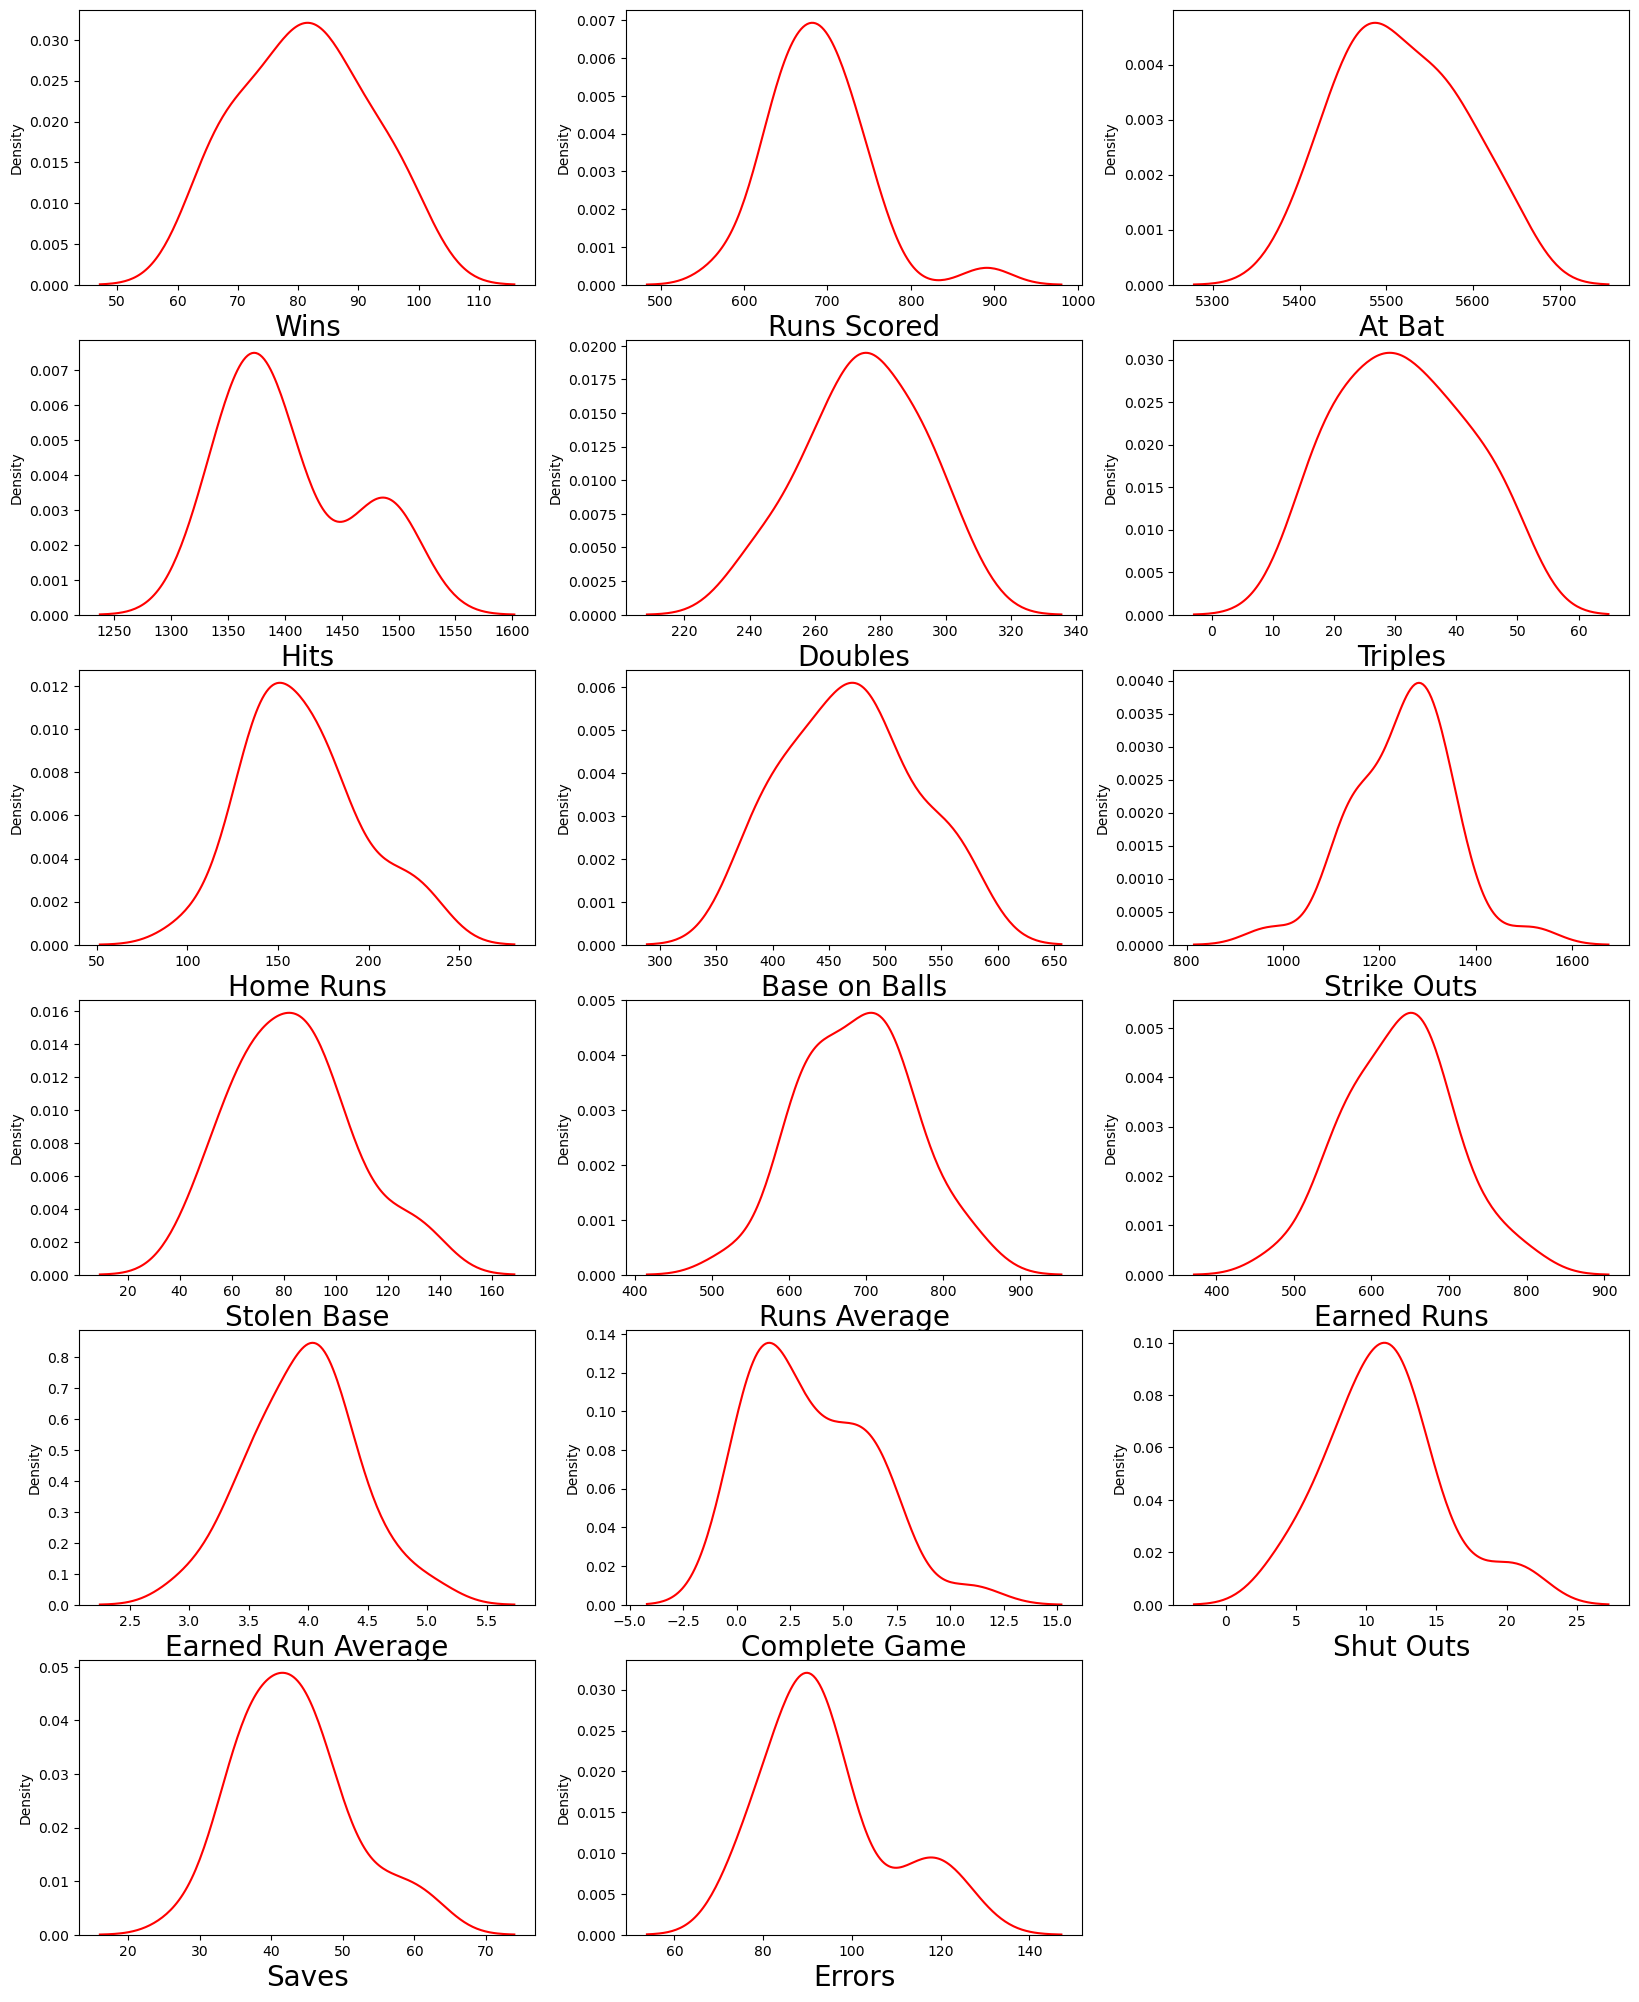

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
pn =1
for column in df:
    if pn <=17:
        ax = plt.subplot(6,3,pn)
        sns.distplot(df[column], color='r',hist=False)
        plt.xlabel(column,fontsize=20)
    pn+=1
plt.show()


Comments
--
as we can see from above distibution plots also that the data is pretty normally distributed except for some skewness in some of the features

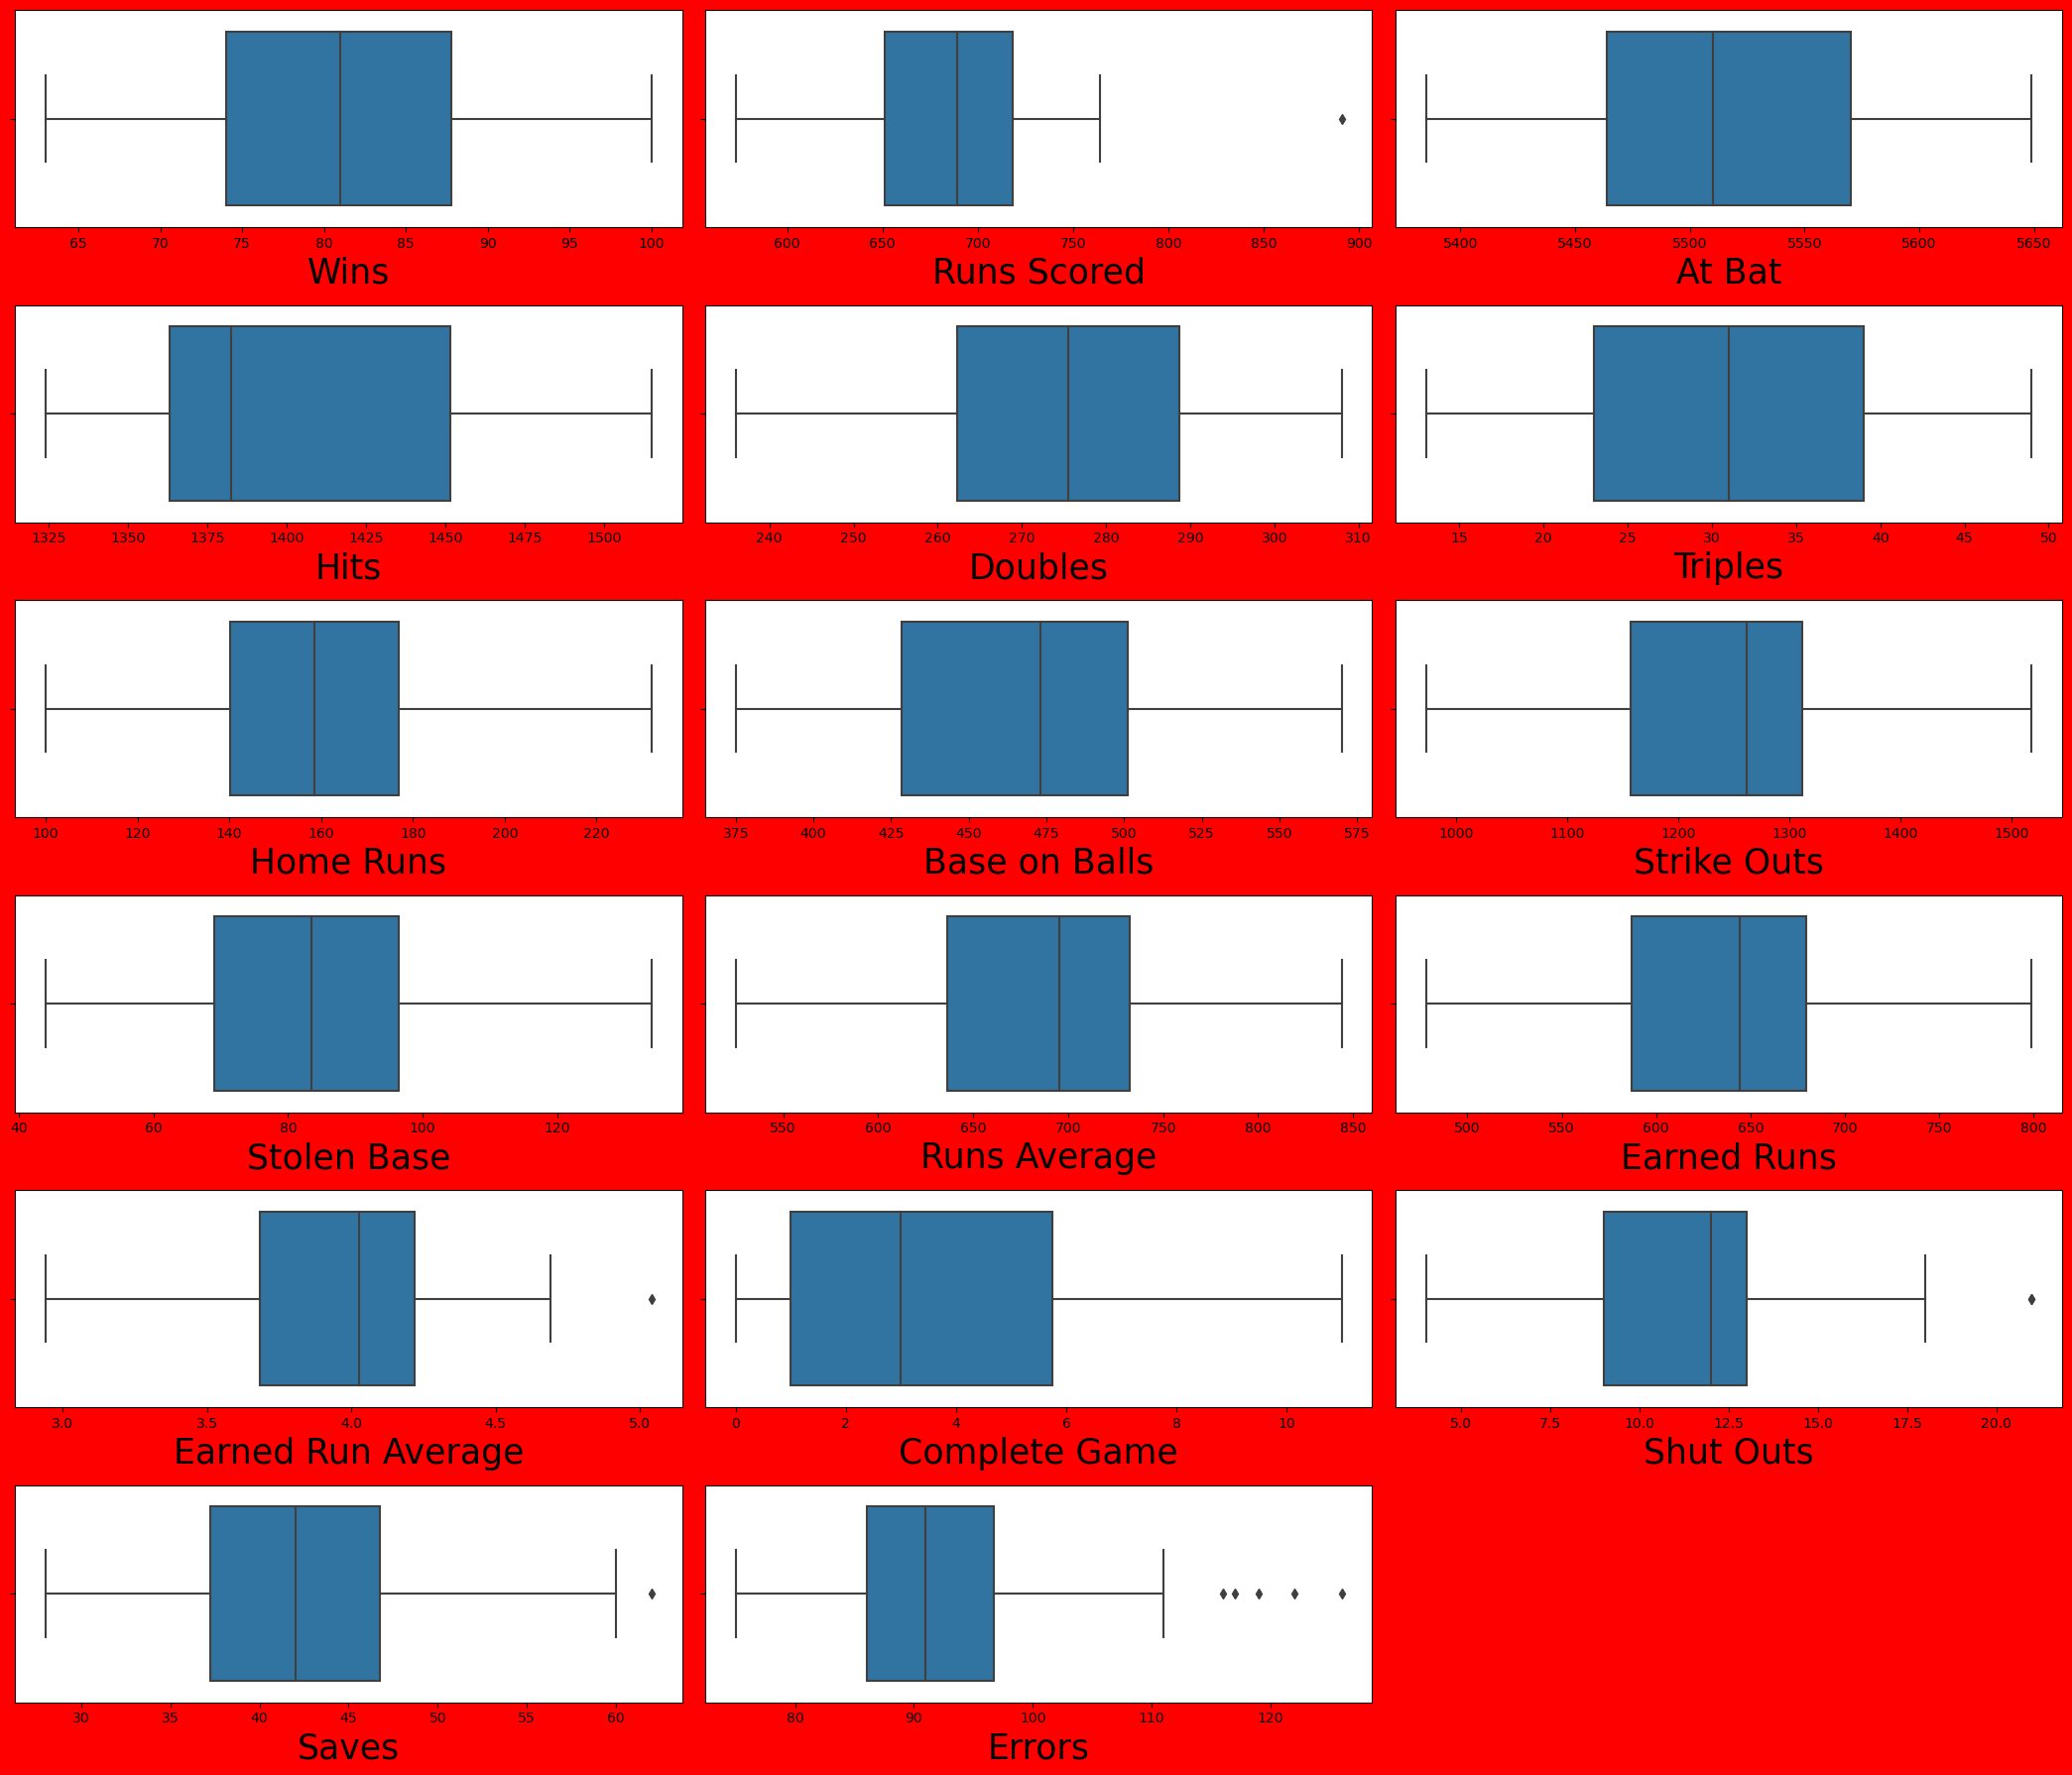

In [23]:
plt.figure(figsize=(21,18), facecolor='red')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()


Comments- here we can see from the box plot that in Runs scored, Earned run average,shutouts,saves and errors all have some outliers since its real game data these outliers are valid data because in sports a player can have an extraorinarily great or bad day but we will need to remove the outliers since it will affect the peformance of our model.



In [48]:
df.loc[df['Runs Scored']==df['Runs Scored'].max()]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


COMMENTS- this is the only one outlier entry in Runs scored so we will remove it


Removing the outliers
--


In [49]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
df1.shape

(29, 17)

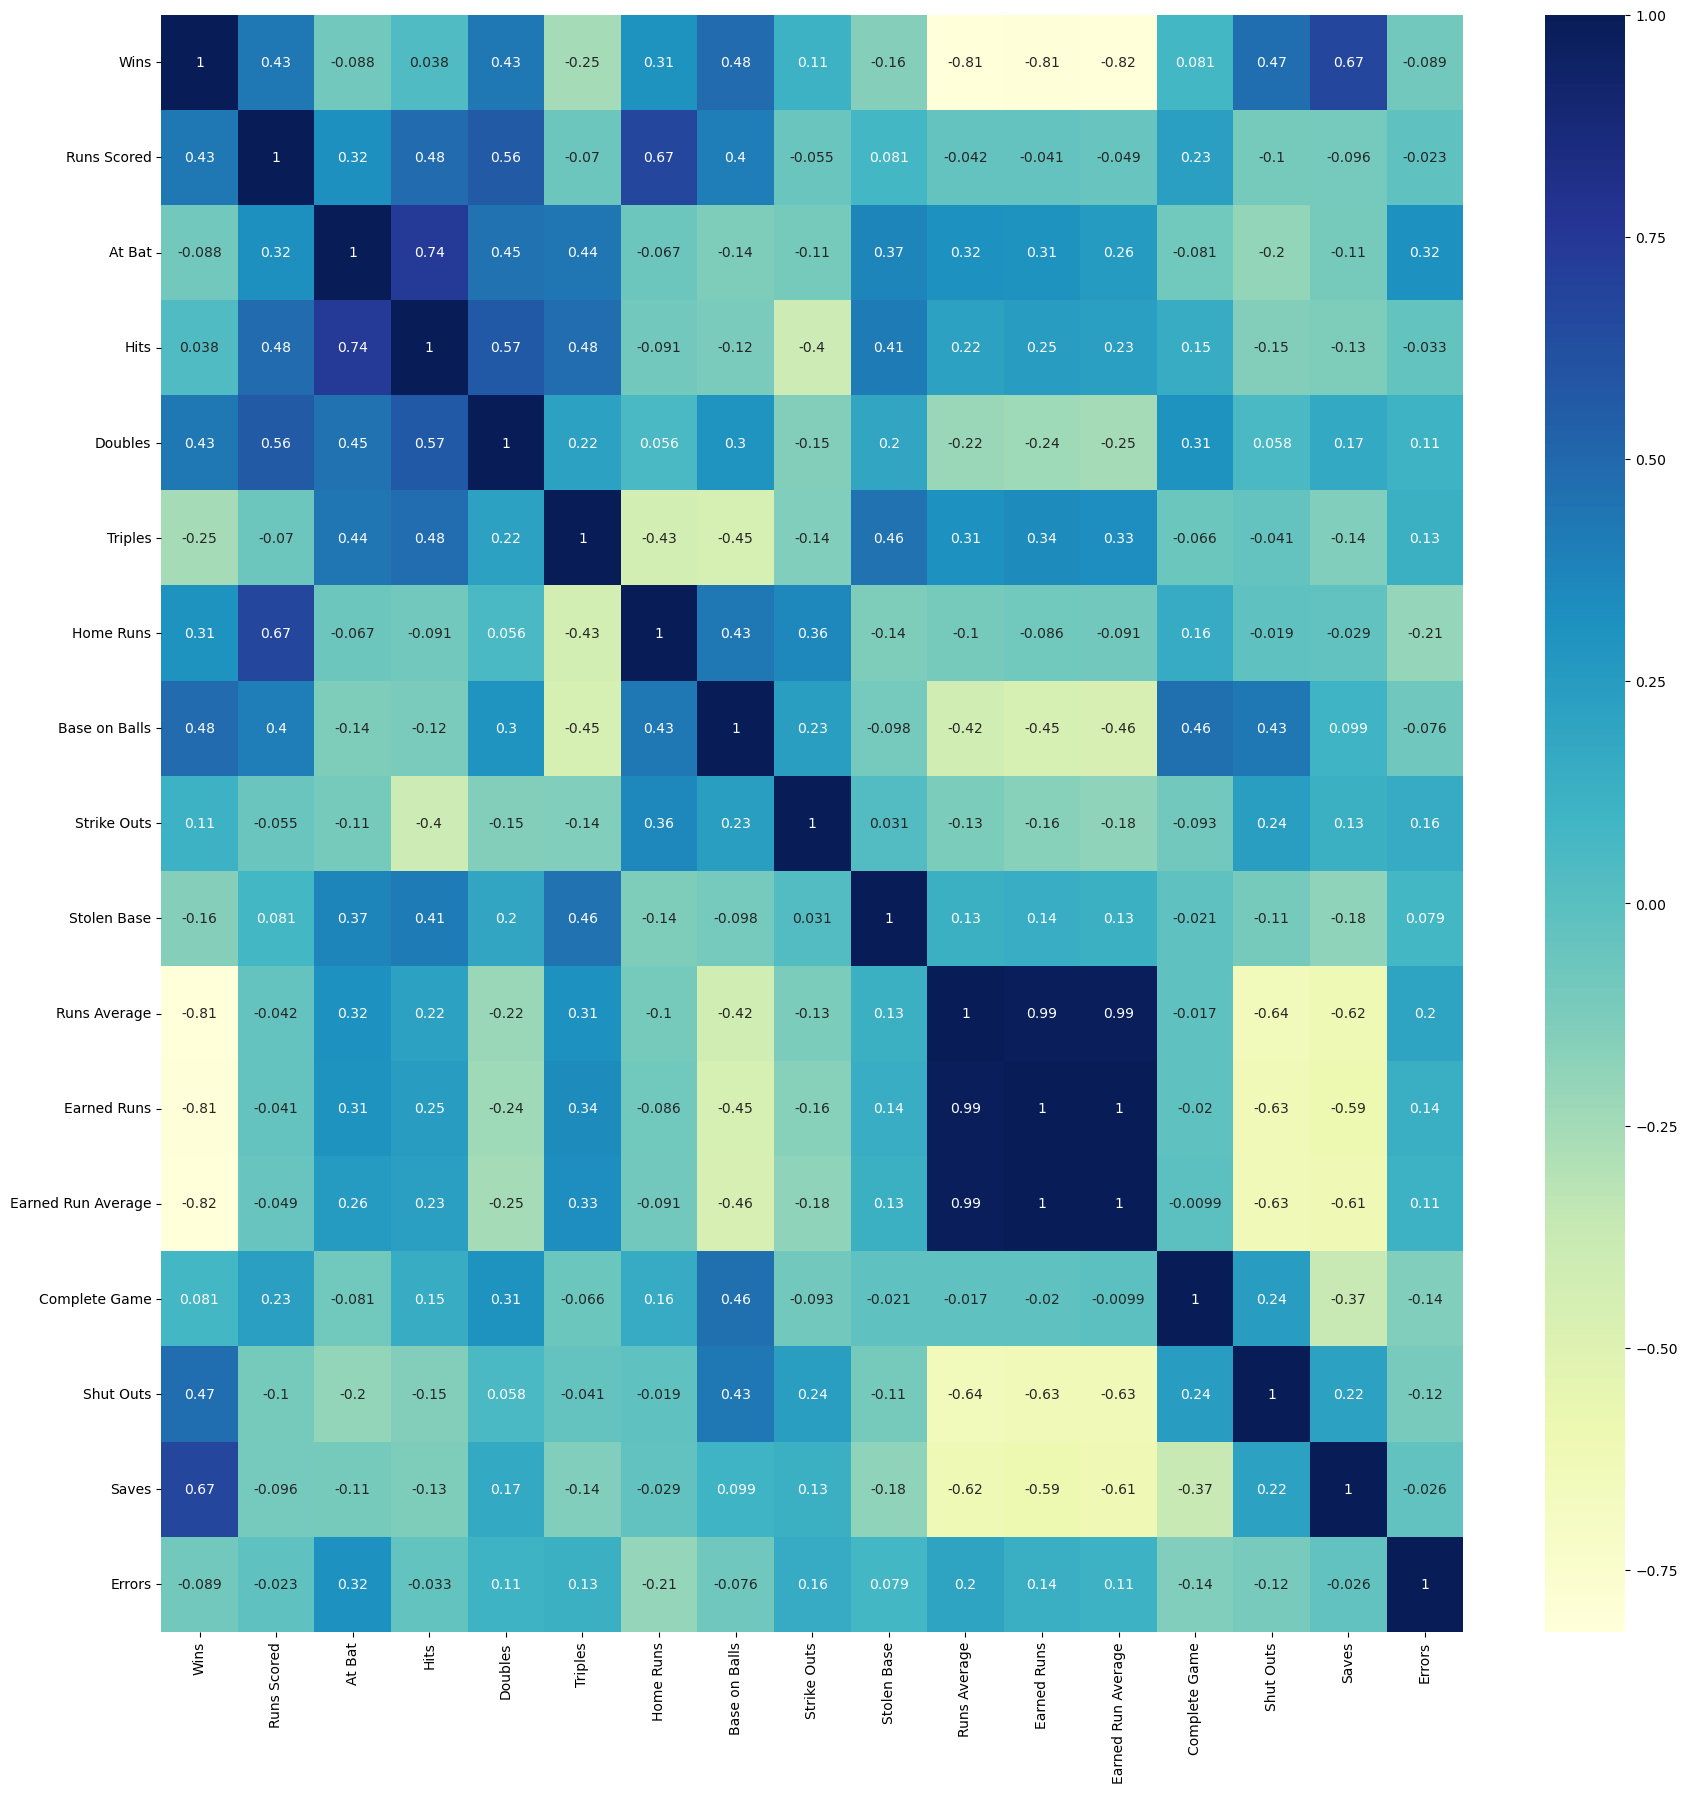

In [41]:
plt.figure(figsize=(21,21), facecolor='white')
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
  
# displaying heatmap
plt.show()


Comments
--
here we can make out the correlationbetween variables from above heat map
1. Saves, shutout,Base on balls,home runs,runs scored are huge factors in the Number of wins
2. At bats and hits are highly related .
3. At bat is directly proportion to hits, doubles ,triple,home runs and runs scored understandably as longer one bats he will score more. these all variables have huge correlation.
4. Base on balls has huge correlation with Shut outs and Complete games as the pithcers who pitches most are more probable to give more base on balls. it has a huge impact on wins also as base on balls is pitcher helping the other team score easily by letting them walk to next base.
5. Runs average,Earned runs, Earned runs Average are almost identical data sets since they have almost perfect correlation coefficients.
6. Hits,Error, At bats, Complete game have a very low correlation with our target variable so may as well drop them form our dataset to contain overfitting
7. We need to apply data scaling to tackle high correlation among the variable.

Dividing data into features and label 
--

In [44]:
X=df.drop(columns =['Wins'])
Y=df['Wins']

Data scaling to tackle multicollinearity
--


In [53]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

Principal component analysis
--

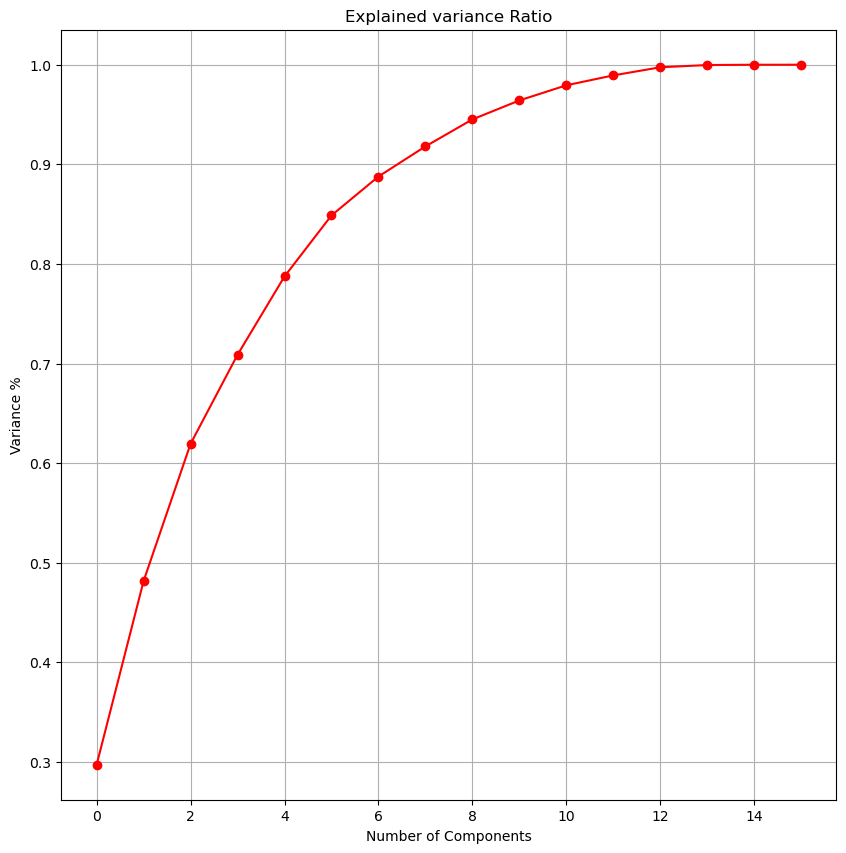

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

COmments--As we can see here 7 features have more than 95% variance so we will pick the features with low variance


In [55]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

Splitting train and test data
--


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.3)

Building linear regression model
--


In [67]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print("Predicted win:",y_pred)
print("Actual win\n",Y_test)

Predicted win: [ 85.52752743 100.52456174  85.90341811  71.71681726  95.29303638
  69.0936912   88.87752647  84.21618938  87.75866075]
Actual win
 2      81
15    100
26     84
23     67
5      93
4      74
6      87
17     97
8      80
Name: Wins, dtype: int64


Checkin r2 score  of our linear regression model
--

In [68]:
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 R2 Score :
0.671787309880246


Checking cross validation score of our model
 --

In [73]:
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6535377372045642


knn regressor model
--

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.446102634562892
RMSE value for k=  2 is: 7.84573486395988
RMSE value for k=  3 is: 6.815016100086957
RMSE value for k=  4 is: 6.765927710061479
RMSE value for k=  5 is: 7.7988603155988265
RMSE value for k=  6 is: 7.201894469555722
RMSE value for k=  7 is: 7.044078904941911
RMSE value for k=  8 is: 6.795116710632064
RMSE value for k=  9 is: 7.347442469101931
RMSE value for k=  10 is: 8.103497187428813


finding the value for k which has best RMSE value i.e. k=4


regression models evaluation,cross validation


In [80]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)

model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 6.440778835978837
Mean squared error : 53.93956162075586
Root Mean Squared Error: 7.344355766216385


 R2 Score :
0.47436182732420296


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.31794575326776364


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 4.460842302081161
Mean squared error : 32.68376033317898
Root Mean Squared Error: 5.716971255234626


 R2 Score :
0.6814984856848536


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.7008814809489899


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 4.505407839810788
Mean squared error : 33.387788390020255
Root Mean Squared Error: 5.778216713660042


 R2 Score :
0.674637769539023


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.7015821501859492


 Error of  

here we can say that decision tree give best R2 score of 0.71 so will use Decision tree regressor.

Final model
--

In [83]:

import joblib
joblib.dump(dtc,'Baseball.pkl')

['Baseball.pkl']